In [65]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import nltk
import seaborn as sns
from nltk.corpus import stopwords
import string
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score
import pickle

In [2]:
pip install wordcloud


Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install Pillow

Note: you may need to restart the kernel to use updated packages.


In [4]:
nltk.download("punkt")

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\welcome\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [5]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\welcome\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [6]:
sms_df=pd.read_csv("spam.csv",encoding="ISO-8859-1")

In [7]:
sms_df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [8]:
sms_df.shape

(5572, 5)

In [9]:
#INDEX
#1.Data Cleaning
#2. EDA
#3. Text PreProcessing
#4. Model Bulding
#5. Evaluation
#6.Improvement
#7. Website
#8. Deploy


# DATA CLEANING


In [10]:
sms_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [11]:
#dropping Last Three Columns
sms_df.drop(columns=["Unnamed: 2","Unnamed: 3","Unnamed: 4"],inplace=True)

In [12]:
sms_df.rename(columns={"v1":"Target","v2":"Text"},inplace=True)

In [13]:
sms_df
encoder=LabelEncoder()
sms_df["Target"]=encoder.fit_transform(sms_df["Target"])

In [14]:
sms_df

,Target,Text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will Ì_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


In [15]:
sms_df.isnull().sum()

Target    0
Text      0
dtype: int64

In [16]:
sms_df.duplicated().sum()

403

In [17]:
sms_df.drop_duplicates(keep="first",inplace=True)

In [18]:
sms_df.duplicated().sum()

0

# EDA 

In [19]:
sms_df["Target"].value_counts()

0    4516
1     653
Name: Target, dtype: int64

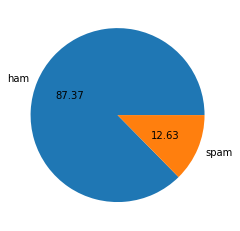

In [20]:
plt.pie(sms_df["Target"].value_counts(),labels=["ham","spam"],autopct="%0.2f")
plt.show()

In [21]:
sms_df["num_character"]=sms_df["Text"].apply(lambda x:len(x))

In [22]:
sms_df["num_words"]=sms_df["Text"].apply(lambda x:len(nltk.word_tokenize(x)))

In [23]:
sms_df["num_sentences"]=sms_df["Text"].apply(lambda x:len(nltk.sent_tokenize(x)))

In [24]:
sms_df.head()

,Target,Text,num_character,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [25]:
sms_df[sms_df["Target"]==0][["num_character","num_words","num_sentences"]].describe()

,num_character,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123339,1.815545
std,56.358207,13.491315,1.364098
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [26]:
sms_df[sms_df["Target"]==1][["num_character","num_words","num_sentences"]].describe()

,num_character,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.969372
std,30.137753,7.008418,1.488910
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


<AxesSubplot:xlabel='num_character', ylabel='Count'>

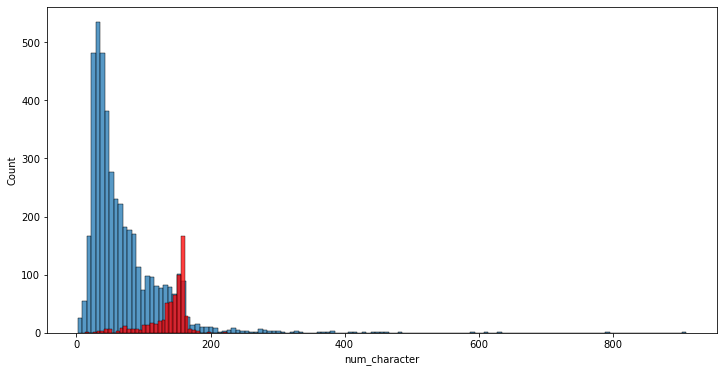

In [27]:
plt.figure(figsize=(12,6))
sns.histplot(sms_df.query("Target==0")["num_character"])
sns.histplot(sms_df.query("Target==1")["num_character"],color="red")

<AxesSubplot:xlabel='num_words', ylabel='Count'>

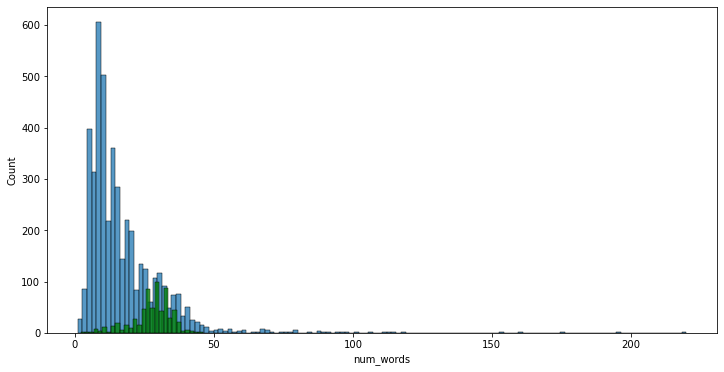

In [28]:
plt.figure(figsize=(12,6))
sns.histplot(sms_df.query("Target==0")["num_words"])
sns.histplot(sms_df.query("Target==1")["num_words"],color="green")

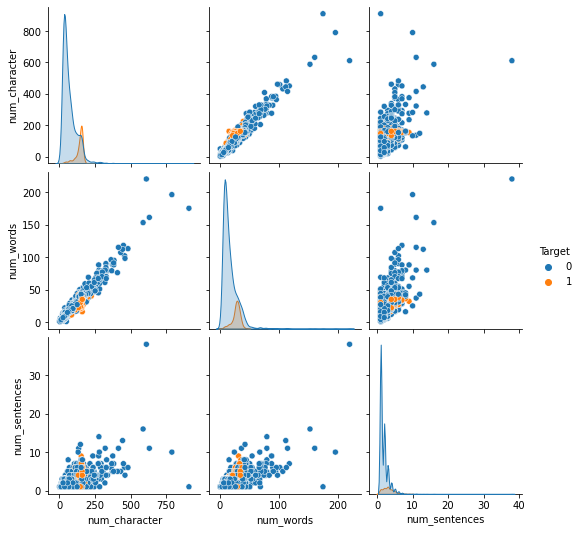

In [29]:
sns.pairplot(sms_df,hue="Target")

<AxesSubplot:>

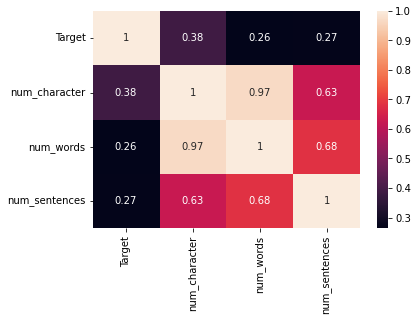

In [30]:
sns.heatmap(sms_df.corr(),annot=True)

# Data Preprocessing


In [31]:
# lower case
# Tokenization
# Removing special characters
# Removing words and punctuations
# Stemming
ps=PorterStemmer()

In [32]:
def transform_text(text):
    text=text.lower()
    text=nltk.word_tokenize(text)
    y=[]
    for i in text:
        if i.isalnum():
            y.append(i)
    text=y[:]
    y.clear()
    for i in text:
        if  i not in stopwords.words("english") and i not in string.punctuation:
            y.append(i)
    text=y[:]
    y.clear()
    for i in text:
        y.append(ps.stem(i))
        
            
    return " ".join(y)

In [33]:
sms_df["transformed_text"]=sms_df["Text"].apply(transform_text)

In [34]:
sms_df.head()

,Target,Text,num_character,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [35]:
wc=WordCloud(width=500,height=500,background_color="white",min_font_size=10)

In [36]:
pip install --upgrade Pillow

Note: you may need to restart the kernel to use updated packages.


In [37]:
spam_wc=wc.generate(sms_df[sms_df["Target"]==1]["transformed_text"].str.cat(sep=" "))

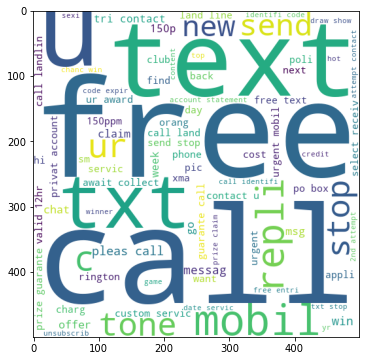

In [38]:
#coomon words in spam
plt.figure(figsize=(12,6))
plt.imshow(spam_wc)

In [39]:
ham_wc=wc.generate(sms_df[sms_df["Target"]==0]["transformed_text"].str.cat(sep=" "))

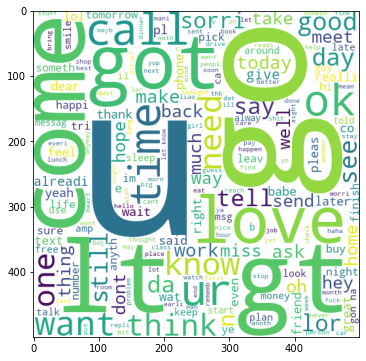

In [40]:
plt.figure(figsize=(12,6))
plt.imshow(ham_wc)

In [41]:
spam_corpus=[]
for msg in sms_df[sms_df["Target"]==1]["transformed_text"].tolist():
    for words in msg.split():
        spam_corpus.append(words)


In [42]:
len(spam_corpus)

9939

C:\Users\welcome\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


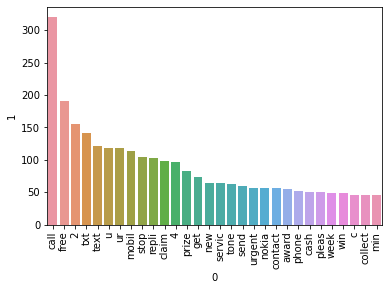

In [43]:
sns.barplot(pd.DataFrame(Counter(spam_corpus).most_common(30))[0],pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation="90")
plt.show()

In [44]:
ham_corpus=[]
for msg in sms_df[sms_df["Target"]==0]["transformed_text"].tolist():
    for words in msg.split():
        ham_corpus.append(words)


In [45]:
len(ham_corpus)

35402

C:\Users\welcome\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


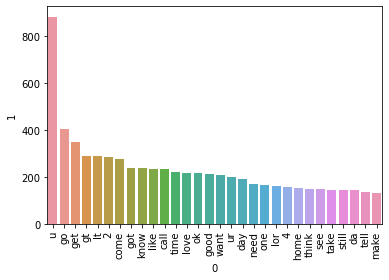

In [46]:
sns.barplot(pd.DataFrame(Counter(ham_corpus).most_common(30))[0],pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
plt.xticks(rotation="90")
plt.show()

# Model Building AND Hyperparameter Tuning


In [47]:
# For Textual data we coomonly take Naive Bayes
# we generally use data in numerical format since our target data is in numerical form.
# we convert text to numbers or vectors
#Bag of Words
#TfIDF


In [48]:
cv=CountVectorizer()
X=cv.fit_transform(sms_df["transformed_text"]).toarray()

In [49]:
X.shape

(5169, 6708)

In [50]:
Y=sms_df["Target"].values

In [51]:
Y

array([0, 0, 1, ..., 0, 0, 0])

In [52]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=10)

In [53]:
gnb=GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()

In [54]:
gnb.fit(X_train,Y_train)
y_pred1=gnb.predict(X_test)
print(accuracy_score(Y_test,y_pred1))
print(confusion_matrix(Y_test,y_pred1))
print(precision_score(Y_test,y_pred1))

0.867504835589942
[[788 120]
 [ 17 109]]
0.4759825327510917


In [55]:
mnb.fit(X_train,Y_train)
y_pred2=mnb.predict(X_test)
print(accuracy_score(Y_test,y_pred2))
print(confusion_matrix(Y_test,y_pred2))
print(precision_score(Y_test,y_pred2))

0.9738878143133463
[[891  17]
 [ 10 116]]
0.8721804511278195


In [56]:
bnb.fit(X_train,Y_train)
y_pred3=bnb.predict(X_test)
print(accuracy_score(Y_test,y_pred3))
print(confusion_matrix(Y_test,y_pred3))
print(precision_score(Y_test,y_pred3))

0.9613152804642167
[[902   6]
 [ 34  92]]
0.9387755102040817


In [57]:
#tfidf Vectorizer
tfidf=TfidfVectorizer(max_features=3000)
X1=tfidf.fit_transform(sms_df["transformed_text"]).toarray()

In [58]:
X1.shape

(5169, 3000)

In [59]:
Y1=sms_df["Target"].values

In [60]:
X1_train,X1_test,Y1_train,Y1_test=train_test_split(X1,Y1,test_size=0.2,random_state=10)

In [61]:
gnb=GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()

In [62]:
gnb.fit(X1_train,Y1_train)
y_pred1=gnb.predict(X1_test)
print(accuracy_score(Y1_test,y_pred1))
print(confusion_matrix(Y1_test,y_pred1))
print(precision_score(Y1_test,y_pred1))

0.8607350096711799
[[783 125]
 [ 19 107]]
0.46120689655172414


In [63]:
mnb.fit(X1_train,Y1_train)
y_pred2=mnb.predict(X1_test)
print(accuracy_score(Y1_test,y_pred2))
print(confusion_matrix(Y1_test,y_pred2))
print(precision_score(Y1_test,y_pred2))

0.9642166344294004
[[908   0]
 [ 37  89]]
1.0


In [64]:
bnb.fit(X1_train,Y1_train)
y_pred3=bnb.predict(X1_test)
print(accuracy_score(Y1_test,y_pred3))
print(confusion_matrix(Y1_test,y_pred3))
print(precision_score(Y1_test,y_pred3))

0.9748549323017408
[[907   1]
 [ 25 101]]
0.9901960784313726


In [66]:
pickle.dump(tfidf,open("Vectorizer.pkl","wb"))
pickle.dump(mnb,open("Model.pkl","wb"))